## 2.2 Using #include to create a forest
In this example we take the birch tree from the previous example and create a forest.

In [1]:
from __future__ import print_function, division
import os
from run_start import *
from hips import hips2img
%matplotlib inline

Below a simple code example of how to import tree objects from <code><span style="background-color: lightgrey">obj/birch_tree.obj</span></code> into <code><span style="background-color: lightgrey">obj/a_pair_of_birch_trees.obj</span></code>.

<code>
    mtllib materials.matlib
    \#include obj/birch_tree.obj <span style="color:green"><i># relative path to .obj</i></span>
    !{
    usemtl white
    v 0 0 0
    v 0 0 1
    plane -1 -2
    !}
    !{
    g two_trees <span style="color:green"><i># #inlcude are hierarchical so we can use this group later</i></span>
    clone 0 0 0 0 birch tree 0 <span style="color:green"><i># object in #include is named this</i></span>
    clone -.8 0 0 55.35 birch tree 0
    !}
</code>

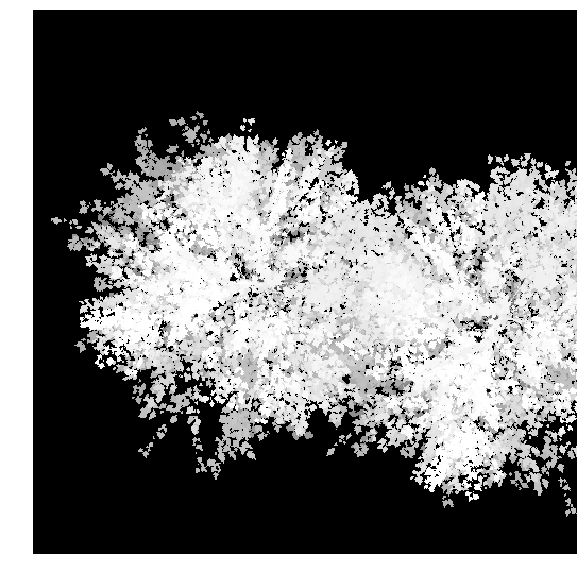

In [2]:
# check the terminal window running iPython for progress
cmd = "echo 16 0 0 5 2 2 512 512 1 output/single_birch.hips | start -v obj/a_pair_of_birch_trees.obj"
error = run_start(cmd)

if not error:
    hips2img('output/single_birch.hips', order=[0])

In [3]:
# to run obj blocks interactively
def run_code(code):
    # writes code string to temporary file
    with open('obj/obj_example.obj', 'w') as O:
        O.write(code)

    # runs start
    cmd = "echo 16 0 0 5 2 2 216 216 1 output/obj_example.hips | \
           start obj/obj_example.obj"
    error = run_start(cmd)

    # displays hips image output
    if not error:
        hips2img('output/obj_example.hips', stretch=False)

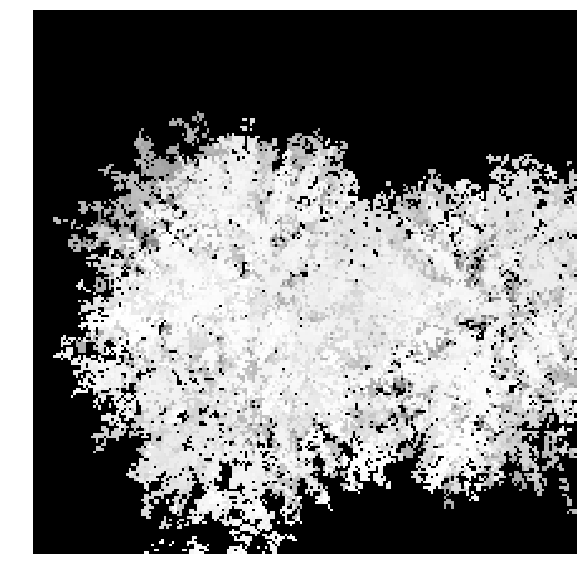

In [4]:
code = """
mtllib materials.matlib
#include obj/birch_tree.obj
!{
usemtl white
v 0 0 0
v 0 0 1
plane -1 -2
!}
!{
g two_trees
clone 0 0 0 0 birch tree 0
clone -.8 0 0 55.35 birch tree 0
clone .2 .6 1 -90 birch tree 0
!}
"""

run_code(code)

\#include is also hierarchical, so for example, we can #include the <code><span style="background-color: lightgrey">obj/a_pair_of_birch_trees.obj</span></code> into a new <code>.obj</code>.  This code be a way of building larger forest scenes efficiently.

<code>
mtllib materials.matlib
\#include obj/a_pair_of_trees.obj
\#include obj/birch_tree.obj <span style="color:green"><i># also the single birch to show multiple includes</i></span>
!{
usemtl soil
v 0 0 0
v 0 0 1
plane -1 -2
!}
!{
clone 0 0 0 0 two_trees <span style="color:green"><i># object in #include is named this</i></span>
clone -2 0 0 55.35 birch tree 0
clone -1 -1 0 18 two_trees
!}
</code>

However, to get this to run you must first comment out the materials library reference in <code><span style="background-color: lightgrey">obj/a_pair_of_birch_trees.obj</span></code> otherwise you will get an error.

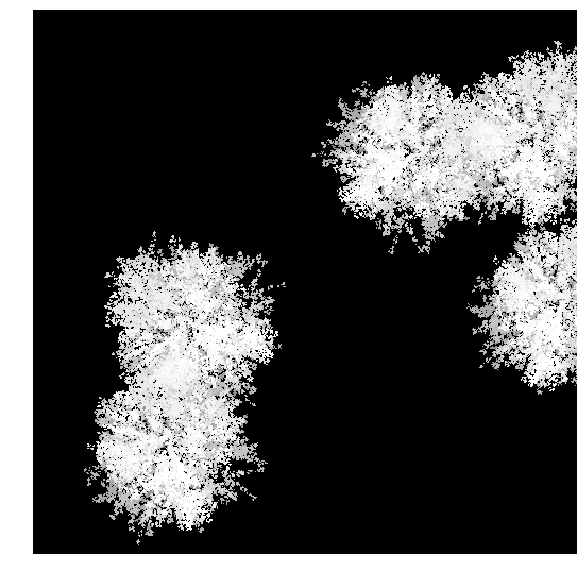

In [5]:
# check the terminal window running iPython for progress
cmd = "echo 16 0 0 5 4 4 512 512 1 output/single_birch.hips | start -v obj/hierarchy_example.obj"
error = run_start(cmd)

if not error:
    hips2img('output/single_birch.hips', order=[0])